Note: I worked on this assignment together with Nora

In [147]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import math
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statistics import mean
from fractions import Fraction as fr
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('employeers.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


DATA CLEANING:

Age, attrition, hourly rate, distance from home, environment and job satisfaction, hours, working years, training,monthly income, 

In [148]:
df = df[['Age','Attrition', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PerformanceRating", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole"]]
# df = df.dropna() #get rid of rows with empty cells
df.head()
# df['Survived'].value_counts()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole
0,41,Yes,1102,1,2,94,4,5993,19479,8,3,8,0,6,4
1,49,No,279,8,3,61,2,5130,24907,1,4,10,3,10,7
2,37,Yes,1373,2,4,92,3,2090,2396,6,3,7,3,0,0
3,33,No,1392,3,4,56,3,2909,23159,1,3,8,3,8,7
4,27,No,591,2,1,40,2,3468,16632,9,3,6,3,2,2


Exploratory data analysis:

df = df[['Age', 'Attrition', 'MonthlyIncome', "TotalWorkingYears", "PerformanceRating"]] #making a new dataframe with a subset
sns.pairplot(df)
plt.show()

There is a correlation with the Total Working Years and the Age, the Monthly Income and Age, Total Working Hours and Monthly Income. 

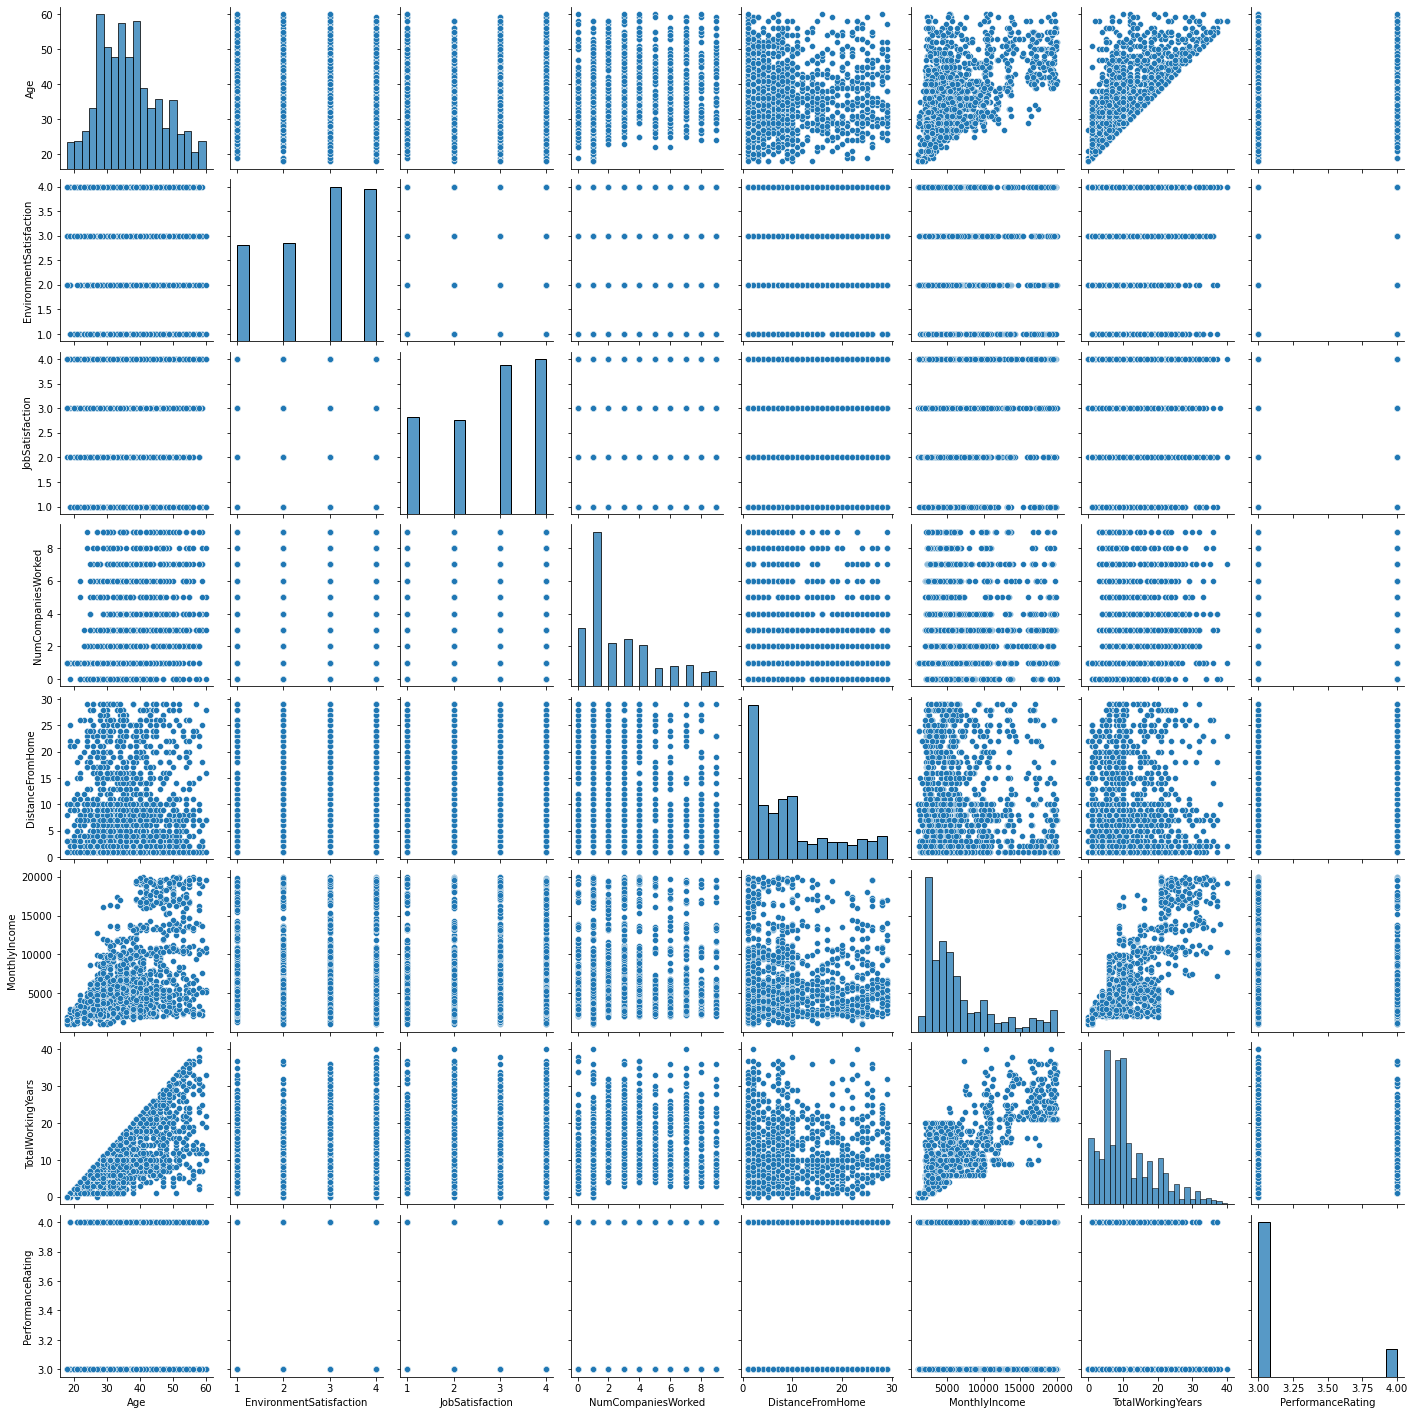

In [149]:
df = df[['Age', "Attrition", 'EnvironmentSatisfaction', 'JobSatisfaction', 'NumCompaniesWorked', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'PerformanceRating']] #making a new dataframe with a subset
sns.pairplot(df)
plt.show()

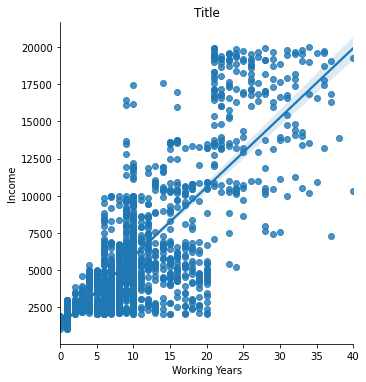

In [150]:
sns.lmplot(x='TotalWorkingYears', y='MonthlyIncome', data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Working Years') #use matplotlib to refine Seaborn plot
plt.ylabel('Income')
plt.title('Title')
plt.show()

In [151]:
df['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

There are more 'No Attrition' than 'Attrition' cases. NO = 83'88% and YES = 16'12%. It will be easier to detect lack of performance and attrition among the employees since there is an almost 20% gap between both groups. Which means only 16'12% of the total of employees suffer from attrition. So we can say that 83'88% is not totally genuine. Calculating the accuracy could be enough for this case.

Let's split the data:

In [152]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df[['MonthlyIncome', "DistanceFromHome", 'TotalWorkingYears']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['Attrition'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [153]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.8208616780045351

In [156]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i)
    knn_new = knn_new.fit(X_train, y_train)
    y_test_pred_new = knn_new.predict(X_test)
    print(f"with {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new))

with 1 neighbors the result is:
              precision    recall  f1-score   support

          No       0.84      0.87      0.85       364
         Yes       0.27      0.23      0.25        77

    accuracy                           0.76       441
   macro avg       0.56      0.55      0.55       441
weighted avg       0.74      0.76      0.75       441

with 2 neighbors the result is:
              precision    recall  f1-score   support

          No       0.83      0.97      0.89       364
         Yes       0.23      0.04      0.07        77

    accuracy                           0.81       441
   macro avg       0.53      0.51      0.48       441
weighted avg       0.72      0.81      0.75       441

with 3 neighbors the result is:
              precision    recall  f1-score   support

          No       0.83      0.94      0.88       364
         Yes       0.29      0.12      0.17        77

    accuracy                           0.80       441
   macro avg       0.56      0.5

82% of Attrition is predicted accurately. We can conclude that the accuracy identifying the Attrition is quite high.

In [134]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[356,   8],
       [ 72,   5]])

In [132]:
conf_matrix = pd.DataFrame(cm, index=["No", "Yes"], columns = ['No_p', "Yes_p"]) 
conf_matrix

,No_p,Yes_p
No,356,8
Yes,72,5


RESULTS:

RECALL: 356/(356+8) = 0'978 

PRECISION: 356/(356+72) = 0'83  